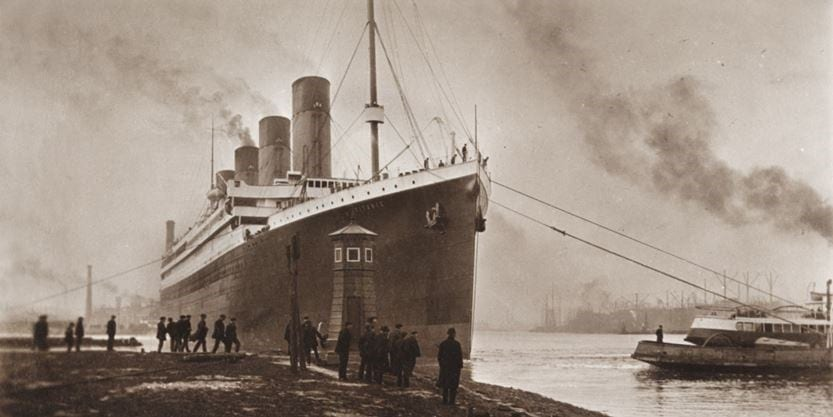


# The Titanic — billed as an unsinkable ship — hit an iceberg and sank on April 15, 1912. Over 1,500 people died in the maritime disaster, while 705 individuals survived. A number of the victims and survivors were famous people

# If you like it please upvote...

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# load the dataset
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [ ]:
# First 5 row
train.head()

In [ ]:
test.head()

In [ ]:
submission.head()

In [ ]:
# Shape of train and test dataset
print(train.shape)
print(test.shape)

In [ ]:
# important information of dataset
print(train.info())
# total null value
print(train.isna().sum())

# EDA - Exploratory Data Analysis

In [ ]:
# function for drop column from train and test
def drop_col(trainORtest, *name):
    drop_list = [*name]
    trainORtest.drop(drop_list, axis=1, inplace=True)
    

In [ ]:
# column name
drop_col(train, "Name", "Ticket", "Cabin", "Fare")
drop_col(test, "Name", "Ticket", "Cabin", "Fare")

In [ ]:
# updated first 5 row
train.head()

In [ ]:
# Unique value
train["Sex"].unique()

In [ ]:
test.head()

In [ ]:
# Label Encoder for encoding column
from sklearn.preprocessing import LabelEncoder

In [ ]:
# encode
encoder = LabelEncoder()

train["Sex"] = encoder.fit_transform(train["Sex"])
test["Sex"] = encoder.fit_transform(test["Sex"])

In [ ]:
train.head()

In [ ]:
train["Sex"].nunique()

In [ ]:
# Port of Embarkation
train["Embarked"].unique()

In [ ]:
# Port of Embarkation fill value
train["Embarked"] = train["Embarked"].fillna("Q")
# encode Embarked column
train["Embarked"] = encoder.fit_transform(train["Embarked"])
test["Embarked"] = encoder.fit_transform(test["Embarked"])

In [ ]:
# mean value of age column and fill
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

mean = test["Age"].mean()
test["Age"] = test["Age"].fillna(mean)

In [ ]:
train.head()

In [ ]:
# correlation
correlation = train.corr()


# heatmap
plt.subplots(figsize=(10,6))
sns.heatmap(correlation, annot=True)

# Correlation with Sex column 
correlation["Sex"].sort_values(ascending=False)

# Pclass - Ticket class
Here, 3rd class passenger mostly not survived

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x=train["Pclass"], hue=train["Survived"], data=train)

# 1-Male, 0-Female
Totally Female Survived Most

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x=train["Sex"], hue=train["Survived"], data=train)

# Most of the passenger were in 3rd class

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x=train["Pclass"])

# C = Cherbourg = 0, Q = Queenstown = 1, S = Southampton = 2

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x=train["Pclass"], hue=train["Embarked"], data=train)

# Parch - No. of parents / children aboard the Titanic
# SibSp - No. of siblings / spouses aboard the Titanic

In [ ]:
plt.subplots(figsize=(8,5))
sns.countplot(x=train["Parch"], data=train)

plt.subplots(figsize=(8,5))
sns.countplot(x=train["SibSp"], hue=train["Pclass"], data=train)

In [ ]:
X = train.drop("Survived", axis=1)
y = train["Survived"].copy()

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# different types of model and accuracy
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(n_estimators=700),
    LogisticRegression(),
    SGDClassifier(),
    GaussianNB(),
#     SVC(kernel = 'linear')
]

models = zip(names, classifiers)
for name, model in models:
    model_name = model
    model_name.fit(X_train, y_train)
    predict = model_name.predict(X_test)
    accuracy1 = accuracy_score(predict, y_test)
    accuracy2 = confusion_matrix(predict, y_test)
    accuracy3 = classification_report(predict, y_test)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = "accuracy")

    print(f"{name} model Accuracy Score {accuracy1}")
    
    print("******************************")
    
    print(f"confusion matrix {accuracy2}")
    
    print("******************************")
    
    print(f"classification report {accuracy3}")
    
    print("******************************")
    
    print(f"{name} and prediction {predict}")
    
    print("******************************")
    
    print(f"cross val score {scores}")
    
    print("*******************************")


# Random Forest accuracy is 81% and LogisticRegression 79%

In [ ]:
# final prediction
a = list(submission["Survived"])
models = zip(names, classifiers)
for name, model in models:
    final_predict = model.predict(test)
    print(f"{name}: {final_predict}")
    print(f"submission : {a}")


In [ ]:
# predict from random forest
models = zip(names, classifiers)
model_select = classifiers[2]
final_predict = model_select.predict(test)


In [ ]:
# create submission dataset
'''
index = test.PassengerId
newFrame = pd.DataFrame({"PassengerId":index, "Survived":final_predict})
newFrame.to_csv("new_titanic_submissio_rf.csv", index=False)
'''

# If you like it please upvote...